<a href="https://colab.research.google.com/github/CakeNuthep/Super_AI/blob/master/Homework/Week4/22p22c0044_%E0%B8%A8%E0%B8%B8%E0%B8%A0%E0%B8%8A%E0%B8%B1%E0%B8%A2_W4HW1_12102020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMAGE ML

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.utils import resample, shuffle

In [ ]:
df_image = pd.read_csv('https://raw.githubusercontent.com/CakeNuthep/Super_AI/master/Homework/Week4/thai-mnist-classification/mnist.train.map.csv')

In [ ]:
df_image

,id,category
0,75606737-d17d-43eb-86e6-6735b6f45a52.png,8
1,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,1
2,c40b7fc4-07f1-4c78-abac-121bde38e267.png,0
3,1b2e1b3d-46f2-4c3f-b741-a8d5099ce710.png,4
4,b8fd3385-9403-48a4-9d9e-74bde635e688.png,9
...,...,...
8250,9b2af0fb-f1be-4782-a614-23fa59a366d7.png,8
8251,ca58239a-7a35-4c96-9b6a-451e112dc5da.png,6
8252,4ec2ba63-0845-4812-a3fa-1f5eda80de8e.png,8
8253,8479e8d8-d592-4931-926c-17a84b02ad0a.png,2


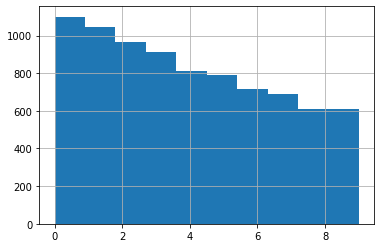

In [ ]:
df_image['category'].hist()
plt.show()

In [ ]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8255 entries, 0 to 8254
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        8255 non-null   object
 1   category  8255 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 129.1+ KB


In [ ]:
df_image.groupby(['category']).agg(['count'])

,id
,count
category,
0,1100
1,1048
2,966
3,910
4,809
5,790
6,718
7,691


## Over sample

In [ ]:
max_size = df_image['category'].value_counts().max()

In [ ]:
lst = [df_image]
for class_index, group in df_image.groupby('category'):
    lst.append(group.sample(max_size-len(group), replace=True))
df_upsampled = pd.concat(lst)

In [ ]:
df_upsampled.groupby(['category']).agg(['count'])

,id
,count
category,
0,1100
1,1100
2,1100
3,1100
4,1100
5,1100
6,1100
7,1100


## Train

In [ ]:
from sklearn.model_selection import KFold
from keras.applications.resnet50 import ResNet50
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image
from PIL import Image, ImageOps
import numpy as np
import requests
import io
import PIL
import pickle
from sklearn.preprocessing import normalize

model = ResNet50(include_top=False, weights='imagenet', classes=1000)

def extract_feature(imgpath):
  if imgpath.find('http')!=-1:
      r = requests.get(imgpath, allow_redirects=True, timeout=10)
      image_bytes = io.BytesIO(r.content)
      img = PIL.Image.open(image_bytes)
  else:
      img = image.load_img(imgpath)
  img = ImageOps.fit(img, (224, 224), Image.ANTIALIAS)
  x = image.img_to_array(img)[:,:,:3]
  #average = np.average(x[:,:,3])
  #print(x.shape)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  features = model.predict(x, batch_size=1,verbose=0)
  features = np.ndarray.flatten(features).astype('float64')
  feat = normalize([features])[0]
  return feat

In [ ]:
df_raw = df_upsampled[:300]

In [ ]:
df_raw

,id,category
0,75606737-d17d-43eb-86e6-6735b6f45a52.png,8
1,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,1
2,c40b7fc4-07f1-4c78-abac-121bde38e267.png,0
3,1b2e1b3d-46f2-4c3f-b741-a8d5099ce710.png,4
4,b8fd3385-9403-48a4-9d9e-74bde635e688.png,9
...,...,...
295,c5898f71-57e5-4b9d-ba5d-fc8281dceea2.png,0
296,1ecd8da1-8e67-40a0-bebd-95b8968fa7d8.png,0
297,02fc4028-12aa-4b84-bcea-5c04ce112d47.png,3
298,a33ba623-c77e-43be-adeb-322840e7a90e.png,2


In [ ]:
extract_feature(f'''https://github.com/CakeNuthep/Super_AI/blob/master/Homework/Week4/thai-mnist-classification/train/00b37b80-125d-4d82-87e4-a22a6314cc11.png?raw=true''')

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
feature = []
verbose = 10
for index, row in df_raw.iterrows():
  f = extract_feature(f'''https://github.com/CakeNuthep/Super_AI/blob/master/Homework/Week4/thai-mnist-classification/train/{row['id']}?raw=true''')
  feature.append(f)
  if index % verbose == 0:
    print(f'''index:{index} data:{row['id']}, {row[1]}''')
df_raw['feature']=feature

index:0 data:75606737-d17d-43eb-86e6-6735b6f45a52.png, 8
index:10 data:9f8baef0-f96b-4faf-84c1-006edb606d09.png, 9
index:20 data:3b115b22-c9a2-4ecb-95c4-4ab23e620480.png, 6
index:30 data:6024e758-b319-4545-9be7-8afb3a6b6a45.png, 1
index:40 data:36dfb6a8-57f4-465b-a13b-81cb4a0fcbf3.png, 4
index:50 data:590dc139-fa5a-47b1-a3f4-0d08f5567267.png, 7
index:60 data:dd5a99ca-e382-4742-a41c-48dfce22e1ec.png, 0
index:70 data:c44f88cf-f033-4370-98fe-990a64cefa49.png, 1
index:80 data:4a46d626-7b35-4238-a288-afaa367df575.png, 0
index:90 data:e1f6e1b4-a495-4f6f-93df-24c0a6a212da.png, 0
index:100 data:a8164c5d-4bdd-416d-8ba1-5260c4737796.png, 2
index:110 data:2b00dcb8-a9c5-47a8-957f-064a25636df7.png, 0
index:120 data:362b4003-f858-4945-a614-29af7ac8c6f4.png, 8
index:130 data:763f7c7e-4d33-42c5-95b6-d1a03a8659c3.png, 0
index:140 data:dede57fb-ecdf-461d-8ec4-c81f7a69ae26.png, 8
index:150 data:26b5f692-035c-4a0c-8783-590bbf297861.png, 3
index:160 data:9c8028ee-320c-4c00-a0c0-54c9e8df2161.png, 0
index:17

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
with open('feature_extraction.pk', 'rb') as pickle_file:
   df_raw = pickle.load(pickle_file)

In [ ]:
df_raw

,id,category,feature
0,75606737-d17d-43eb-86e6-6735b6f45a52.png,8,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0003797173668..."
1,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,c40b7fc4-07f1-4c78-abac-121bde38e267.png,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0004022961074..."
3,1b2e1b3d-46f2-4c3f-b741-a8d5099ce710.png,4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,b8fd3385-9403-48a4-9d9e-74bde635e688.png,9,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...
295,c5898f71-57e5-4b9d-ba5d-fc8281dceea2.png,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0003887041000..."
296,1ecd8da1-8e67-40a0-bebd-95b8968fa7d8.png,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
297,02fc4028-12aa-4b84-bcea-5c04ce112d47.png,3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005880281741..."
298,a33ba623-c77e-43be-adeb-322840e7a90e.png,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
pickle.dump(df_raw,open("feature_extraction.pk",'wb'))

In [ ]:
df_raw = df_raw.sample(frac = 1) 

In [ ]:
import pickle
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
def trainmodel(dataset,num_folds,modfile=''):
  trainfeat, testfeat, trainlabel, testlabel = train_test_split(dataset['feature'], dataset['category'], test_size=0.33, random_state=42)
  # clf = LinearSVC()
  # clf = CalibratedClassifierCV() 
  
  clf=RandomForestClassifier(n_estimators=100,random_state=1234)
  
  
  # Define the K-fold Cross Validator
  kfold = KFold(n_splits=num_folds, shuffle=True)
  fold_no = 1
  for train, test in kfold.split(trainfeat, trainlabel):
    mod = clf.fit(np.vstack(trainfeat.values[train]),np.vstack(trainlabel.values[train]))
    
    xxx = np.vstack(trainfeat.values[test].ravel())
    print(xxx.shape)

    res = mod.predict(np.vstack(trainfeat.values[test].ravel()))
    
    acc=0
    acc = sum(res == trainlabel.values[test])/len(res)
    print(f'fold{fold_no} acc:{acc}')
    fold_no = fold_no + 1

  res = mod.predict(np.vstack(testfeat.values.ravel()))  
  acc = sum(res == testlabel.values)/len(res)
  print(f'acc with test data {acc}')
  if modfile!='':
      pickle.dump(mod,open(modfile,'wb'))
  conf = mod.predict_proba(np.vstack(testfeat.values))
  return mod,acc,conf,testlabel

In [ ]:
mod,acc,conf,testlabel = trainmodel(df_raw,5,'class_model.mod')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


(41, 100352)
fold1 acc:0.6097560975609756


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


(40, 100352)
fold2 acc:0.625


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


(40, 100352)
fold3 acc:0.775


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


(40, 100352)
fold4 acc:0.7


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


(40, 100352)
fold5 acc:0.65
acc with test data 0.8080808080808081


In [ ]:
acc

0.3939393939393939

# Expression ML

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import datetime as dt
from sklearn.utils import resample, shuffle

In [ ]:
df_map = pd.read_csv('https://raw.githubusercontent.com/CakeNuthep/Super_AI/master/Homework/Week4/thai-mnist-classification/mnist.train.map.csv')

In [ ]:
df_compete = pd.read_csv('https://raw.githubusercontent.com/CakeNuthep/Super_AI/master/Homework/Week4/thai-mnist-classification/train.rules.csv')

In [ ]:
df_compete

,id,feature1,feature2,feature3,predict
0,7c5fda39-c4a6-4d49-a0f6-751c7cd72bb4,NaN,75606737-d17d-43eb-86e6-6735b6f45a52.png,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,9
1,7e15ec1b-fe36-4a9e-a1cd-7c160e6a1b9c,NaN,75606737-d17d-43eb-86e6-6735b6f45a52.png,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,9
2,96b5d8b6-61cd-49f2-b22f-16fe25483cbc,NaN,75606737-d17d-43eb-86e6-6735b6f45a52.png,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,9
3,84ce5493-7e0f-4aee-8bb7-f799d714b5b3,NaN,c40b7fc4-07f1-4c78-abac-121bde38e267.png,1b2e1b3d-46f2-4c3f-b741-a8d5099ce710.png,4
4,7cb117e7-d8f3-400b-aeb3-a84fa3fb54e8,NaN,c40b7fc4-07f1-4c78-abac-121bde38e267.png,1b2e1b3d-46f2-4c3f-b741-a8d5099ce710.png,4
...,...,...,...,...,...
5550,769b31a2-cb7e-4a89-89d6-efed3199872e,0c754c5d-4166-433e-ac4d-4d1c7ef8e30a.png,bee226cb-6fbf-4470-b2de-d98e5af6110a.png,8801b5ff-821c-477e-9ce7-f65199f75646.png,0
5551,9f603c3a-4475-4d4b-a3ee-e8f868979749,787e9fe5-cb37-4cc5-afbb-20351616ff71.png,90ef2abe-439b-4655-a932-5a8ca5a91b71.png,c39f05cf-17aa-4b7d-afd3-29667f039216.png,51
5552,f25bbfff-6fd9-41f5-b2c2-0059b1a76bc6,a8c56afb-35cf-473a-bcd9-0927f8b6994b.png,7d15bcf1-5141-480c-9265-70a74aa2ed27.png,8f9eba51-8123-4186-8b11-8d2d2d9d134a.png,55
5553,e550dbb5-5127-4828-ac5b-153e9229992e,70ffaa6c-25a1-435a-8413-a8ad26fc8d7d.png,9b2af0fb-f1be-4782-a614-23fa59a366d7.png,ca58239a-7a35-4c96-9b6a-451e112dc5da.png,67


In [ ]:
df_map_unique = df_map.drop_duplicates()

In [ ]:
df_map_unique

,id,category
0,75606737-d17d-43eb-86e6-6735b6f45a52.png,8
1,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,1
2,c40b7fc4-07f1-4c78-abac-121bde38e267.png,0
3,1b2e1b3d-46f2-4c3f-b741-a8d5099ce710.png,4
4,b8fd3385-9403-48a4-9d9e-74bde635e688.png,9
...,...,...
8250,9b2af0fb-f1be-4782-a614-23fa59a366d7.png,8
8251,ca58239a-7a35-4c96-9b6a-451e112dc5da.png,6
8252,4ec2ba63-0845-4812-a3fa-1f5eda80de8e.png,8
8253,8479e8d8-d592-4931-926c-17a84b02ad0a.png,2


In [ ]:
len(df_map['id'].unique())

8255

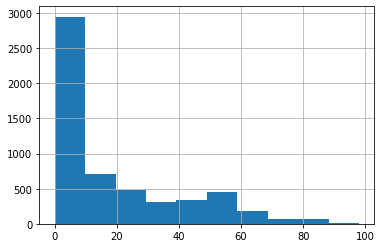

In [ ]:
df_compete['predict'].hist()
plt.show()

In [ ]:
df_compete.groupby(['predict']).agg(['count'])

,id,feature1,feature2,feature3
,count,count,count,count
predict,,,,
0,645,641,645,645
1,345,334,345,345
2,291,283,291,291
3,319,314,319,319
4,252,239,252,252
...,...,...,...,...
88,8,8,8,8
90,1,1,1,1


## Over Sample

In [ ]:
max_size = df_compete['predict'].value_counts().max()

In [ ]:
lst = [df_compete]
for class_index, group in df_compete.groupby('predict'):
    lst.append(group.sample(max_size-len(group), replace=True))
df_upsampled = pd.concat(lst)

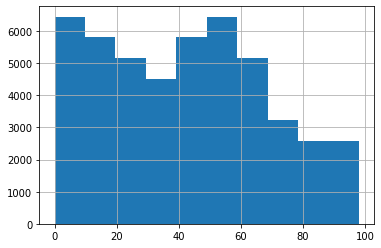

In [ ]:
df_upsampled['predict'].hist()
plt.show()

In [ ]:
df_upsampled.groupby(['predict']).agg(['count'])

,id,feature1,feature2,feature3
,count,count,count,count
predict,,,,
0,645,641,645,645
1,645,623,645,645
2,645,628,645,645
3,645,637,645,645
4,645,615,645,645
...,...,...,...,...
88,645,645,645,645
90,645,645,645,645


In [ ]:
df_upsampled

,id,feature1,feature2,feature3,predict
0,7c5fda39-c4a6-4d49-a0f6-751c7cd72bb4,NaN,75606737-d17d-43eb-86e6-6735b6f45a52.png,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,9
1,7e15ec1b-fe36-4a9e-a1cd-7c160e6a1b9c,NaN,75606737-d17d-43eb-86e6-6735b6f45a52.png,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,9
2,96b5d8b6-61cd-49f2-b22f-16fe25483cbc,NaN,75606737-d17d-43eb-86e6-6735b6f45a52.png,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,9
3,84ce5493-7e0f-4aee-8bb7-f799d714b5b3,NaN,c40b7fc4-07f1-4c78-abac-121bde38e267.png,1b2e1b3d-46f2-4c3f-b741-a8d5099ce710.png,4
4,7cb117e7-d8f3-400b-aeb3-a84fa3fb54e8,NaN,c40b7fc4-07f1-4c78-abac-121bde38e267.png,1b2e1b3d-46f2-4c3f-b741-a8d5099ce710.png,4
...,...,...,...,...,...
4914,1b3f8298-c6c2-439c-b396-10f8e36e2089,24a5e71c-bc34-4adb-8c76-160b2c990989.png,a199c672-1f2b-4c31-a2f1-e94814bd5e05.png,0b2ee805-9264-464b-b586-1daec3bb52e9.png,98
4914,1b3f8298-c6c2-439c-b396-10f8e36e2089,24a5e71c-bc34-4adb-8c76-160b2c990989.png,a199c672-1f2b-4c31-a2f1-e94814bd5e05.png,0b2ee805-9264-464b-b586-1daec3bb52e9.png,98
4914,1b3f8298-c6c2-439c-b396-10f8e36e2089,24a5e71c-bc34-4adb-8c76-160b2c990989.png,a199c672-1f2b-4c31-a2f1-e94814bd5e05.png,0b2ee805-9264-464b-b586-1daec3bb52e9.png,98
4914,1b3f8298-c6c2-439c-b396-10f8e36e2089,24a5e71c-bc34-4adb-8c76-160b2c990989.png,a199c672-1f2b-4c31-a2f1-e94814bd5e05.png,0b2ee805-9264-464b-b586-1daec3bb52e9.png,98


In [ ]:
df_upsampled = df_upsampled.rename(columns={"id": "ID"})

In [ ]:
df_upsampled.isna().sum()

ID             0
feature1    1520
feature2       0
feature3       0
predict        0
dtype: int64

In [ ]:
merg_data = pd.merge(df_upsampled, df_map_unique, left_on='feature1',right_on='id',how='left')
merg_data = pd.merge(merg_data, df_map_unique, left_on='feature2',right_on='id',how='left')
merg_data = pd.merge(merg_data, df_map_unique, left_on='feature3',right_on='id',how='left')

In [ ]:
merg_data

,ID,feature1,feature2,feature3,predict,id_x,category_x,id_y,category_y,id,category
0,7c5fda39-c4a6-4d49-a0f6-751c7cd72bb4,NaN,75606737-d17d-43eb-86e6-6735b6f45a52.png,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,9,NaN,NaN,75606737-d17d-43eb-86e6-6735b6f45a52.png,8,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,1
1,7e15ec1b-fe36-4a9e-a1cd-7c160e6a1b9c,NaN,75606737-d17d-43eb-86e6-6735b6f45a52.png,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,9,NaN,NaN,75606737-d17d-43eb-86e6-6735b6f45a52.png,8,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,1
2,96b5d8b6-61cd-49f2-b22f-16fe25483cbc,NaN,75606737-d17d-43eb-86e6-6735b6f45a52.png,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,9,NaN,NaN,75606737-d17d-43eb-86e6-6735b6f45a52.png,8,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,1
3,84ce5493-7e0f-4aee-8bb7-f799d714b5b3,NaN,c40b7fc4-07f1-4c78-abac-121bde38e267.png,1b2e1b3d-46f2-4c3f-b741-a8d5099ce710.png,4,NaN,NaN,c40b7fc4-07f1-4c78-abac-121bde38e267.png,0,1b2e1b3d-46f2-4c3f-b741-a8d5099ce710.png,4
4,7cb117e7-d8f3-400b-aeb3-a84fa3fb54e8,NaN,c40b7fc4-07f1-4c78-abac-121bde38e267.png,1b2e1b3d-46f2-4c3f-b741-a8d5099ce710.png,4,NaN,NaN,c40b7fc4-07f1-4c78-abac-121bde38e267.png,0,1b2e1b3d-46f2-4c3f-b741-a8d5099ce710.png,4
...,...,...,...,...,...,...,...,...,...,...,...
47725,1b3f8298-c6c2-439c-b396-10f8e36e2089,24a5e71c-bc34-4adb-8c76-160b2c990989.png,a199c672-1f2b-4c31-a2f1-e94814bd5e05.png,0b2ee805-9264-464b-b586-1daec3bb52e9.png,98,24a5e71c-bc34-4adb-8c76-160b2c990989.png,8.0,a199c672-1f2b-4c31-a2f1-e94814bd5e05.png,4,0b2ee805-9264-464b-b586-1daec3bb52e9.png,5
47726,1b3f8298-c6c2-439c-b396-10f8e36e2089,24a5e71c-bc34-4adb-8c76-160b2c990989.png,a199c672-1f2b-4c31-a2f1-e94814bd5e05.png,0b2ee805-9264-464b-b586-1daec3bb52e9.png,98,24a5e71c-bc34-4adb-8c76-160b2c990989.png,8.0,a199c672-1f2b-4c31-a2f1-e94814bd5e05.png,4,0b2ee805-9264-464b-b586-1daec3bb52e9.png,5
47727,1b3f8298-c6c2-439c-b396-10f8e36e2089,24a5e71c-bc34-4adb-8c76-160b2c990989.png,a199c672-1f2b-4c31-a2f1-e94814bd5e05.png,0b2ee805-9264-464b-b586-1daec3bb52e9.png,98,24a5e71c-bc34-4adb-8c76-160b2c990989.png,8.0,a199c672-1f2b-4c31-a2f1-e94814bd5e05.png,4,0b2ee805-9264-464b-b586-1daec3bb52e9.png,5
47728,1b3f8298-c6c2-439c-b396-10f8e36e2089,24a5e71c-bc34-4adb-8c76-160b2c990989.png,a199c672-1f2b-4c31-a2f1-e94814bd5e05.png,0b2ee805-9264-464b-b586-1daec3bb52e9.png,98,24a5e71c-bc34-4adb-8c76-160b2c990989.png,8.0,a199c672-1f2b-4c31-a2f1-e94814bd5e05.png,4,0b2ee805-9264-464b-b586-1daec3bb52e9.png,5


In [ ]:
df_drop = merg_data.drop(['feature1','feature2','feature3','id_x','id_y','id'],axis=1)

In [ ]:
df_drop

,ID,predict,category_x,category_y,category
0,7c5fda39-c4a6-4d49-a0f6-751c7cd72bb4,9,NaN,8,1
1,7e15ec1b-fe36-4a9e-a1cd-7c160e6a1b9c,9,NaN,8,1
2,96b5d8b6-61cd-49f2-b22f-16fe25483cbc,9,NaN,8,1
3,84ce5493-7e0f-4aee-8bb7-f799d714b5b3,4,NaN,0,4
4,7cb117e7-d8f3-400b-aeb3-a84fa3fb54e8,4,NaN,0,4
...,...,...,...,...,...
47725,1b3f8298-c6c2-439c-b396-10f8e36e2089,98,8.0,4,5
47726,1b3f8298-c6c2-439c-b396-10f8e36e2089,98,8.0,4,5
47727,1b3f8298-c6c2-439c-b396-10f8e36e2089,98,8.0,4,5
47728,1b3f8298-c6c2-439c-b396-10f8e36e2089,98,8.0,4,5


In [ ]:
df_drop = df_drop.rename(columns={"category_x": "feature1","category_y":"feature2","category":"feature3"})

In [ ]:
df_drop.head

<bound method NDFrame.head of                                          ID  predict  ...  feature2  feature3
0      7c5fda39-c4a6-4d49-a0f6-751c7cd72bb4        9  ...         8         1
1      7e15ec1b-fe36-4a9e-a1cd-7c160e6a1b9c        9  ...         8         1
2      96b5d8b6-61cd-49f2-b22f-16fe25483cbc        9  ...         8         1
3      84ce5493-7e0f-4aee-8bb7-f799d714b5b3        4  ...         0         4
4      7cb117e7-d8f3-400b-aeb3-a84fa3fb54e8        4  ...         0         4
...                                     ...      ...  ...       ...       ...
47725  1b3f8298-c6c2-439c-b396-10f8e36e2089       98  ...         4         5
47726  1b3f8298-c6c2-439c-b396-10f8e36e2089       98  ...         4         5
47727  1b3f8298-c6c2-439c-b396-10f8e36e2089       98  ...         4         5
47728  1b3f8298-c6c2-439c-b396-10f8e36e2089       98  ...         4         5
47729  4e765abd-8289-4b3c-aa0a-1f2b5eb209d4       98  ...         4         5

[47730 rows x 5 columns]>

In [ ]:
df_drop.isna().sum()

ID             0
predict        0
feature1    1520
feature2       0
feature3       0
dtype: int64

In [ ]:
df_drop.fillna(-1,inplace=True)

In [ ]:
df_drop.isna().sum()

ID          0
predict     0
feature1    0
feature2    0
feature3    0
dtype: int64

In [ ]:
df_drop

,ID,predict,feature1,feature2,feature3
0,7c5fda39-c4a6-4d49-a0f6-751c7cd72bb4,9,-1.0,8,1
1,7e15ec1b-fe36-4a9e-a1cd-7c160e6a1b9c,9,-1.0,8,1
2,96b5d8b6-61cd-49f2-b22f-16fe25483cbc,9,-1.0,8,1
3,84ce5493-7e0f-4aee-8bb7-f799d714b5b3,4,-1.0,0,4
4,7cb117e7-d8f3-400b-aeb3-a84fa3fb54e8,4,-1.0,0,4
...,...,...,...,...,...
47725,1b3f8298-c6c2-439c-b396-10f8e36e2089,98,8.0,4,5
47726,1b3f8298-c6c2-439c-b396-10f8e36e2089,98,8.0,4,5
47727,1b3f8298-c6c2-439c-b396-10f8e36e2089,98,8.0,4,5
47728,1b3f8298-c6c2-439c-b396-10f8e36e2089,98,8.0,4,5


In [ ]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47730 entries, 0 to 47729
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        47730 non-null  object 
 1   predict   47730 non-null  int64  
 2   feature1  47730 non-null  float64
 3   feature2  47730 non-null  int64  
 4   feature3  47730 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.2+ MB


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

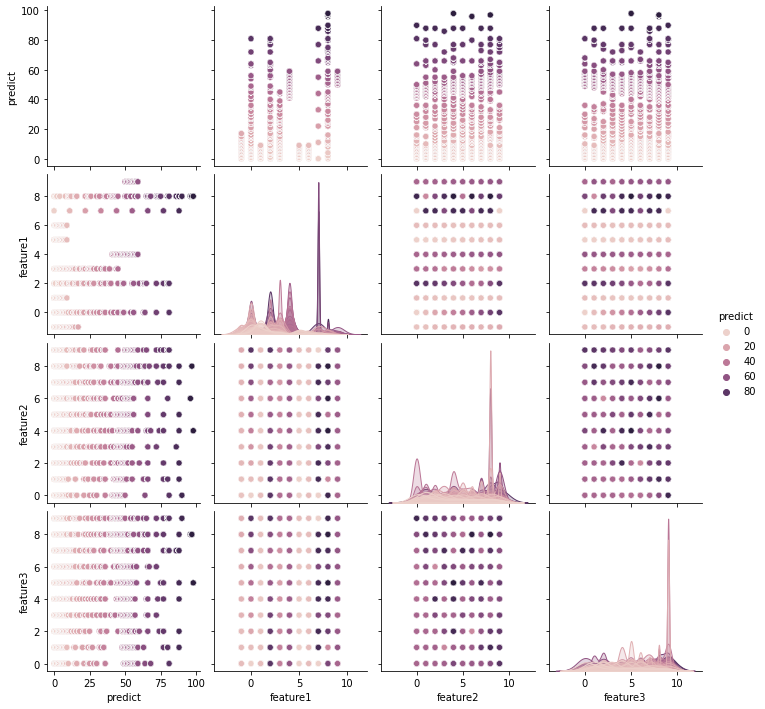

In [ ]:
sns.pairplot(df_drop,hue='predict',vars=['predict','feature1','feature2','feature3'])

## Train

In [ ]:
df_raw = df_drop[:]
df_raw = df_raw.sample(frac = 1) 

In [ ]:
df_raw[['feature1',	'feature2'	,'feature3']]

,feature1,feature2,feature3
21365,3.0,9,0
33472,4.0,8,1
18720,3.0,8,0
35507,2.0,8,2
27304,4.0,4,8
...,...,...,...
19938,0.0,4,8
40942,8.0,4,2
34854,4.0,9,0
18286,3.0,8,0


In [ ]:
from sklearn.model_selection import KFold
import pickle
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
def trainmodel(dataset,num_folds,modfile=''):
  trainfeat, testfeat, trainlabel, testlabel = train_test_split(dataset[['feature1',	'feature2'	,'feature3']], dataset['predict'], test_size=0.2, random_state=42)
  #return trainfeat,testfeat,trainlabel,testlabel
  clf=RandomForestClassifier(n_estimators=100,random_state=1234)
  
  
  # Define the K-fold Cross Validator
  kfold = KFold(n_splits=num_folds, shuffle=True)
  fold_no = 1
  for train, test in kfold.split(trainfeat, trainlabel):
    mod = clf.fit(np.array(trainfeat.values[train]),np.array(trainlabel.values[train]))
    res = mod.predict(np.array(trainfeat.values[test]))
    
    acc=0
    acc = sum(res == trainlabel.values[test])/len(res)
    print(f'fold{fold_no} acc:{acc}')
    fold_no = fold_no + 1

  res = mod.predict(np.array(testfeat.values))  
  acc = sum(res == testlabel.values)/len(res)
  print(f'acc with test data {acc}')
  if modfile!='':
      pickle.dump(mod,open(modfile,'wb'))
  conf = mod.predict_proba(np.array(testfeat.values))
  return mod,acc,conf,testlabel

In [ ]:
mod,acc,conf,testlabel = trainmodel(df_raw,5,'class_model99.mod')

fold1 acc:0.9994762341233469
fold2 acc:0.9993452926541836
fold3 acc:0.9984287023700406
fold4 acc:0.9980358779625508
fold5 acc:0.999214248297538
acc with test data 0.9989524408129059


# Combine ML

In [ ]:
with open('class_model.mod', 'rb') as pickle_file:
    model_image = pickle.load(pickle_file)

with open('class_model99.mod', 'rb') as pickle_file:
    model_expression = pickle.load(pickle_file)

In [ ]:
df_expression = pd.read_csv('https://raw.githubusercontent.com/CakeNuthep/Super_AI/master/Homework/Week4/thai-mnist-classification/train.rules.csv')

In [ ]:
df_expression

,id,feature1,feature2,feature3,predict
0,7c5fda39-c4a6-4d49-a0f6-751c7cd72bb4,NaN,75606737-d17d-43eb-86e6-6735b6f45a52.png,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,9
1,7e15ec1b-fe36-4a9e-a1cd-7c160e6a1b9c,NaN,75606737-d17d-43eb-86e6-6735b6f45a52.png,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,9
2,96b5d8b6-61cd-49f2-b22f-16fe25483cbc,NaN,75606737-d17d-43eb-86e6-6735b6f45a52.png,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,9
3,84ce5493-7e0f-4aee-8bb7-f799d714b5b3,NaN,c40b7fc4-07f1-4c78-abac-121bde38e267.png,1b2e1b3d-46f2-4c3f-b741-a8d5099ce710.png,4
4,7cb117e7-d8f3-400b-aeb3-a84fa3fb54e8,NaN,c40b7fc4-07f1-4c78-abac-121bde38e267.png,1b2e1b3d-46f2-4c3f-b741-a8d5099ce710.png,4
...,...,...,...,...,...
5550,769b31a2-cb7e-4a89-89d6-efed3199872e,0c754c5d-4166-433e-ac4d-4d1c7ef8e30a.png,bee226cb-6fbf-4470-b2de-d98e5af6110a.png,8801b5ff-821c-477e-9ce7-f65199f75646.png,0
5551,9f603c3a-4475-4d4b-a3ee-e8f868979749,787e9fe5-cb37-4cc5-afbb-20351616ff71.png,90ef2abe-439b-4655-a932-5a8ca5a91b71.png,c39f05cf-17aa-4b7d-afd3-29667f039216.png,51
5552,f25bbfff-6fd9-41f5-b2c2-0059b1a76bc6,a8c56afb-35cf-473a-bcd9-0927f8b6994b.png,7d15bcf1-5141-480c-9265-70a74aa2ed27.png,8f9eba51-8123-4186-8b11-8d2d2d9d134a.png,55
5553,e550dbb5-5127-4828-ac5b-153e9229992e,70ffaa6c-25a1-435a-8413-a8ad26fc8d7d.png,9b2af0fb-f1be-4782-a614-23fa59a366d7.png,ca58239a-7a35-4c96-9b6a-451e112dc5da.png,67


In [ ]:
df_expression.fillna(-1,inplace=True)

In [ ]:
df_expression

,id,feature1,feature2,feature3,predict
0,7c5fda39-c4a6-4d49-a0f6-751c7cd72bb4,-1,75606737-d17d-43eb-86e6-6735b6f45a52.png,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,9
1,7e15ec1b-fe36-4a9e-a1cd-7c160e6a1b9c,-1,75606737-d17d-43eb-86e6-6735b6f45a52.png,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,9
2,96b5d8b6-61cd-49f2-b22f-16fe25483cbc,-1,75606737-d17d-43eb-86e6-6735b6f45a52.png,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,9
3,84ce5493-7e0f-4aee-8bb7-f799d714b5b3,-1,c40b7fc4-07f1-4c78-abac-121bde38e267.png,1b2e1b3d-46f2-4c3f-b741-a8d5099ce710.png,4
4,7cb117e7-d8f3-400b-aeb3-a84fa3fb54e8,-1,c40b7fc4-07f1-4c78-abac-121bde38e267.png,1b2e1b3d-46f2-4c3f-b741-a8d5099ce710.png,4
...,...,...,...,...,...
5550,769b31a2-cb7e-4a89-89d6-efed3199872e,0c754c5d-4166-433e-ac4d-4d1c7ef8e30a.png,bee226cb-6fbf-4470-b2de-d98e5af6110a.png,8801b5ff-821c-477e-9ce7-f65199f75646.png,0
5551,9f603c3a-4475-4d4b-a3ee-e8f868979749,787e9fe5-cb37-4cc5-afbb-20351616ff71.png,90ef2abe-439b-4655-a932-5a8ca5a91b71.png,c39f05cf-17aa-4b7d-afd3-29667f039216.png,51
5552,f25bbfff-6fd9-41f5-b2c2-0059b1a76bc6,a8c56afb-35cf-473a-bcd9-0927f8b6994b.png,7d15bcf1-5141-480c-9265-70a74aa2ed27.png,8f9eba51-8123-4186-8b11-8d2d2d9d134a.png,55
5553,e550dbb5-5127-4828-ac5b-153e9229992e,70ffaa6c-25a1-435a-8413-a8ad26fc8d7d.png,9b2af0fb-f1be-4782-a614-23fa59a366d7.png,ca58239a-7a35-4c96-9b6a-451e112dc5da.png,67


In [ ]:
df_raw = df_expression[:100]

In [ ]:
list_number = []
list_feature1 = []
list_feature2 = []
list_feature3 = []
verbose = 10
for index, row in df_raw.iterrows():
  f1 = -1
  f2 = -1
  f3 = -1
  if not(row['feature1'] == -1):
    f1 = extract_feature(f'''https://github.com/CakeNuthep/Super_AI/blob/master/Homework/Week4/thai-mnist-classification/train/{row['feature1']}?raw=true''')
  list_feature1.append(f1)

  if not(row['feature2'] == -1):
    f2 = extract_feature(f'''https://github.com/CakeNuthep/Super_AI/blob/master/Homework/Week4/thai-mnist-classification/train/{row['feature2']}?raw=true''')
  list_feature2.append(f2)

  if not(row['feature3'] == -1):
    f3 = extract_feature(f'''https://github.com/CakeNuthep/Super_AI/blob/master/Homework/Week4/thai-mnist-classification/train/{row['feature3']}?raw=true''')
  list_feature3.append(f3)

  if index % verbose == 0:
    print(f'''index:{index} data:{row['id']}, {row[1]}''')
print(list_number)

index:0 data:7c5fda39-c4a6-4d49-a0f6-751c7cd72bb4, -1
index:10 data:b4d7ffd2-f5cd-4676-92ef-e7e277099401, -1
index:20 data:212d10f0-96f0-4be3-a5a6-da9edd485109, -1
index:30 data:b7617c46-2966-4fd6-807d-fd3fde26d51e, -1
index:40 data:61e9cae8-cd93-4f12-8435-89111357b859, -1
index:50 data:dfcc4a8a-aae6-48db-9a51-c93939335985, -1
index:60 data:12334762-3cc9-40af-89cf-c1f148f5528f, -1
index:70 data:41e3b3a3-33b6-48b3-9003-f0ad5f8da4ad, 945fb6be-2376-4216-b8bb-186a3a187b57.png
index:80 data:1133ecf3-3d4a-4481-85d8-7c07b24149cc, -1
index:90 data:2e365391-8043-4646-aac5-9ce2d5d59372, -1
[]


In [ ]:
df_raw['extract_feature1']=list_feature1
df_raw['extract_feature2']=list_feature2
df_raw['extract_feature3']=list_feature3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df_raw

,id,feature1,feature2,feature3,predict,extract_feature1,extract_feature2,extract_feature3
0,7c5fda39-c4a6-4d49-a0f6-751c7cd72bb4,-1,75606737-d17d-43eb-86e6-6735b6f45a52.png,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,9,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.027077599427040463...","[0.0002118274860775661, 0.0, 0.0, 0.0, 0.0, 0...."
1,7e15ec1b-fe36-4a9e-a1cd-7c160e6a1b9c,-1,75606737-d17d-43eb-86e6-6735b6f45a52.png,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,9,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.027077599427040463...","[0.0002118274860775661, 0.0, 0.0, 0.0, 0.0, 0...."
2,96b5d8b6-61cd-49f2-b22f-16fe25483cbc,-1,75606737-d17d-43eb-86e6-6735b6f45a52.png,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,9,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.027077599427040463...","[0.0002118274860775661, 0.0, 0.0, 0.0, 0.0, 0...."
3,84ce5493-7e0f-4aee-8bb7-f799d714b5b3,-1,c40b7fc4-07f1-4c78-abac-121bde38e267.png,1b2e1b3d-46f2-4c3f-b741-a8d5099ce710.png,4,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,7cb117e7-d8f3-400b-aeb3-a84fa3fb54e8,-1,c40b7fc4-07f1-4c78-abac-121bde38e267.png,1b2e1b3d-46f2-4c3f-b741-a8d5099ce710.png,4,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...
95,2a4a511c-9474-4686-ae5d-e010bfef579c,3e696f15-7ac9-40a2-9dd5-bf3d1a976a5c.png,a8164c5d-4bdd-416d-8ba1-5260c4737796.png,0aff6fc4-e8ad-4e0e-a7d7-70845918e396.png,8,"[0.0024927747460115595, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
96,99f5cb47-f1e5-4a52-a216-24e0c91f3f5f,eda98be8-b684-485a-a820-053d0d6d287c.png,f4b3ddb4-2a2c-4b7a-ba85-5a7892c636a8.png,e010425c-a255-482c-bce2-792078286036.png,12,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.007040827244950632...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.004771758297595033...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
97,8d8f7da4-fd67-4570-b359-5449a75ad5e2,-1,b24087ab-d6fc-4ac3-be34-61c6d0bd4aec.png,d05b36d8-200f-46ff-9ed9-a52bed6b2bfa.png,8,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.006661650901533529...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
98,898b82f9-57dd-4012-a7a1-2c260c005aeb,-1,2bb8cec2-65e5-4c5c-ab0b-d2cb6c68e62e.png,8b7d2763-c1c6-4891-99f0-d67b8801aa3b.png,10,-1,"[0.0, 0.006126226101279531, 0.0, 0.0, 0.0, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
df_raw['feature1'] != -1

0     False
1     False
2     False
3     False
4     False
      ...  
95     True
96     True
97    False
98    False
99     True
Name: feature1, Length: 100, dtype: bool

In [ ]:
df_filter = df_raw[df_raw['feature1'] != -1]
X = np.vstack(df_filter['extract_feature1'])
print(X.shape)
pre = model_image.predict(X)
df_filter['feature1_label'] = pre
df_feature_label = pd.concat([df_raw,df_filter['feature1_label']],axis=1)

(10, 2048)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
df_filter = df_raw[df_raw['feature2'] != -1]
X = np.vstack(df_filter['extract_feature2'])
print(X.shape)
pre = model_image.predict(X)
df_filter['feature2_label'] = pre
df_feature_label = pd.concat([df_feature_label,df_filter['feature2_label']],axis=1)

(100, 2048)


In [ ]:
df_filter = df_raw[df_raw['feature3'] != -1]
X = np.vstack(df_filter['extract_feature3'])
print(X.shape)
pre = model_image.predict(X)
df_filter['feature3_label'] = pre
df_feature_label = pd.concat([df_feature_label,df_filter['feature3_label']],axis=1)

(100, 2048)


In [ ]:
df_feature_label

,id,feature1,feature2,feature3,predict,extract_feature1,extract_feature2,extract_feature3,feature1_label,feature2_label,feature3_label
0,7c5fda39-c4a6-4d49-a0f6-751c7cd72bb4,-1,75606737-d17d-43eb-86e6-6735b6f45a52.png,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,9,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.027077599427040463...","[0.0002118274860775661, 0.0, 0.0, 0.0, 0.0, 0....",NaN,8,1
1,7e15ec1b-fe36-4a9e-a1cd-7c160e6a1b9c,-1,75606737-d17d-43eb-86e6-6735b6f45a52.png,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,9,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.027077599427040463...","[0.0002118274860775661, 0.0, 0.0, 0.0, 0.0, 0....",NaN,8,1
2,96b5d8b6-61cd-49f2-b22f-16fe25483cbc,-1,75606737-d17d-43eb-86e6-6735b6f45a52.png,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,9,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.027077599427040463...","[0.0002118274860775661, 0.0, 0.0, 0.0, 0.0, 0....",NaN,8,1
3,84ce5493-7e0f-4aee-8bb7-f799d714b5b3,-1,c40b7fc4-07f1-4c78-abac-121bde38e267.png,1b2e1b3d-46f2-4c3f-b741-a8d5099ce710.png,4,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0,4
4,7cb117e7-d8f3-400b-aeb3-a84fa3fb54e8,-1,c40b7fc4-07f1-4c78-abac-121bde38e267.png,1b2e1b3d-46f2-4c3f-b741-a8d5099ce710.png,4,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0,4
...,...,...,...,...,...,...,...,...,...,...,...
95,2a4a511c-9474-4686-ae5d-e010bfef579c,3e696f15-7ac9-40a2-9dd5-bf3d1a976a5c.png,a8164c5d-4bdd-416d-8ba1-5260c4737796.png,0aff6fc4-e8ad-4e0e-a7d7-70845918e396.png,8,"[0.0024927747460115595, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,2,1
96,99f5cb47-f1e5-4a52-a216-24e0c91f3f5f,eda98be8-b684-485a-a820-053d0d6d287c.png,f4b3ddb4-2a2c-4b7a-ba85-5a7892c636a8.png,e010425c-a255-482c-bce2-792078286036.png,12,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.007040827244950632...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.004771758297595033...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,2,6
97,8d8f7da4-fd67-4570-b359-5449a75ad5e2,-1,b24087ab-d6fc-4ac3-be34-61c6d0bd4aec.png,d05b36d8-200f-46ff-9ed9-a52bed6b2bfa.png,8,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.006661650901533529...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,8,0
98,898b82f9-57dd-4012-a7a1-2c260c005aeb,-1,2bb8cec2-65e5-4c5c-ab0b-d2cb6c68e62e.png,8b7d2763-c1c6-4891-99f0-d67b8801aa3b.png,10,-1,"[0.0, 0.006126226101279531, 0.0, 0.0, 0.0, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,4,6


In [ ]:
df_feature_label.fillna(-1,inplace=True)

In [ ]:
X = np.array(df_feature_label[['feature1_label','feature2_label','feature3_label']])

In [ ]:
ml_predict = model_expression.predict(X)

In [ ]:
df_feature_label['predict'] == ml_predict

0      True
1      True
2      True
3      True
4      True
      ...  
95    False
96     True
97     True
98     True
99    False
Name: predict, Length: 100, dtype: bool

In [ ]:
acc = sum(df_feature_label['predict'] == ml_predict)/len(ml_predict)

In [ ]:
acc

0.72

# Submit

In [ ]:
with open('class_model.mod', 'rb') as pickle_file:
    model_image = pickle.load(pickle_file)

with open('class_model99.mod', 'rb') as pickle_file:
    model_expression = pickle.load(pickle_file)

In [ ]:
df_expression = pd.read_csv('https://raw.githubusercontent.com/CakeNuthep/Super_AI/master/Homework/Week4/thai-mnist-classification/test.rules.csv')

In [ ]:
df_expression

,id,feature1,feature2,feature3,predict
0,7c5fda39-c4a6-4d49-a0f6-751c7cd72bb4,NaN,75606737-d17d-43eb-86e6-6735b6f45a52.png,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,9
1,7e15ec1b-fe36-4a9e-a1cd-7c160e6a1b9c,NaN,75606737-d17d-43eb-86e6-6735b6f45a52.png,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,9
2,96b5d8b6-61cd-49f2-b22f-16fe25483cbc,NaN,75606737-d17d-43eb-86e6-6735b6f45a52.png,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,9
3,84ce5493-7e0f-4aee-8bb7-f799d714b5b3,NaN,c40b7fc4-07f1-4c78-abac-121bde38e267.png,1b2e1b3d-46f2-4c3f-b741-a8d5099ce710.png,4
4,7cb117e7-d8f3-400b-aeb3-a84fa3fb54e8,NaN,c40b7fc4-07f1-4c78-abac-121bde38e267.png,1b2e1b3d-46f2-4c3f-b741-a8d5099ce710.png,4
...,...,...,...,...,...
5550,769b31a2-cb7e-4a89-89d6-efed3199872e,0c754c5d-4166-433e-ac4d-4d1c7ef8e30a.png,bee226cb-6fbf-4470-b2de-d98e5af6110a.png,8801b5ff-821c-477e-9ce7-f65199f75646.png,0
5551,9f603c3a-4475-4d4b-a3ee-e8f868979749,787e9fe5-cb37-4cc5-afbb-20351616ff71.png,90ef2abe-439b-4655-a932-5a8ca5a91b71.png,c39f05cf-17aa-4b7d-afd3-29667f039216.png,51
5552,f25bbfff-6fd9-41f5-b2c2-0059b1a76bc6,a8c56afb-35cf-473a-bcd9-0927f8b6994b.png,7d15bcf1-5141-480c-9265-70a74aa2ed27.png,8f9eba51-8123-4186-8b11-8d2d2d9d134a.png,55
5553,e550dbb5-5127-4828-ac5b-153e9229992e,70ffaa6c-25a1-435a-8413-a8ad26fc8d7d.png,9b2af0fb-f1be-4782-a614-23fa59a366d7.png,ca58239a-7a35-4c96-9b6a-451e112dc5da.png,67


In [ ]:
df_expression.fillna(-1,inplace=True)

In [ ]:
df_expression

,id,feature1,feature2,feature3,predict
0,7c5fda39-c4a6-4d49-a0f6-751c7cd72bb4,-1,75606737-d17d-43eb-86e6-6735b6f45a52.png,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,9
1,7e15ec1b-fe36-4a9e-a1cd-7c160e6a1b9c,-1,75606737-d17d-43eb-86e6-6735b6f45a52.png,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,9
2,96b5d8b6-61cd-49f2-b22f-16fe25483cbc,-1,75606737-d17d-43eb-86e6-6735b6f45a52.png,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,9
3,84ce5493-7e0f-4aee-8bb7-f799d714b5b3,-1,c40b7fc4-07f1-4c78-abac-121bde38e267.png,1b2e1b3d-46f2-4c3f-b741-a8d5099ce710.png,4
4,7cb117e7-d8f3-400b-aeb3-a84fa3fb54e8,-1,c40b7fc4-07f1-4c78-abac-121bde38e267.png,1b2e1b3d-46f2-4c3f-b741-a8d5099ce710.png,4
...,...,...,...,...,...
5550,769b31a2-cb7e-4a89-89d6-efed3199872e,0c754c5d-4166-433e-ac4d-4d1c7ef8e30a.png,bee226cb-6fbf-4470-b2de-d98e5af6110a.png,8801b5ff-821c-477e-9ce7-f65199f75646.png,0
5551,9f603c3a-4475-4d4b-a3ee-e8f868979749,787e9fe5-cb37-4cc5-afbb-20351616ff71.png,90ef2abe-439b-4655-a932-5a8ca5a91b71.png,c39f05cf-17aa-4b7d-afd3-29667f039216.png,51
5552,f25bbfff-6fd9-41f5-b2c2-0059b1a76bc6,a8c56afb-35cf-473a-bcd9-0927f8b6994b.png,7d15bcf1-5141-480c-9265-70a74aa2ed27.png,8f9eba51-8123-4186-8b11-8d2d2d9d134a.png,55
5553,e550dbb5-5127-4828-ac5b-153e9229992e,70ffaa6c-25a1-435a-8413-a8ad26fc8d7d.png,9b2af0fb-f1be-4782-a614-23fa59a366d7.png,ca58239a-7a35-4c96-9b6a-451e112dc5da.png,67


In [ ]:
df_raw = df_expression[:100]

In [ ]:
list_number = []
list_feature1 = []
list_feature2 = []
list_feature3 = []
verbose = 10
for index, row in df_raw.iterrows():
  f1 = -1
  f2 = -1
  f3 = -1
  if not(row['feature1'] == -1):
    f1 = extract_feature(f'''https://github.com/CakeNuthep/Super_AI/blob/master/Homework/Week4/thai-mnist-classification/test/{row['feature1']}?raw=true''')
  list_feature1.append(f1)

  if not(row['feature2'] == -1):
    f2 = extract_feature(f'''https://github.com/CakeNuthep/Super_AI/blob/master/Homework/Week4/thai-mnist-classification/test/{row['feature2']}?raw=true''')
  list_feature2.append(f2)

  if not(row['feature3'] == -1):
    f3 = extract_feature(f'''https://github.com/CakeNuthep/Super_AI/blob/master/Homework/Week4/thai-mnist-classification/test/{row['feature3']}?raw=true''')
  list_feature3.append(f3)

  if index % verbose == 0:
    print(f'''index:{index} data:{row['id']}, {row[1]}''')
print(list_number)

index:0 data:7c5fda39-c4a6-4d49-a0f6-751c7cd72bb4, -1
index:10 data:b4d7ffd2-f5cd-4676-92ef-e7e277099401, -1
index:20 data:212d10f0-96f0-4be3-a5a6-da9edd485109, -1
index:30 data:b7617c46-2966-4fd6-807d-fd3fde26d51e, -1
index:40 data:61e9cae8-cd93-4f12-8435-89111357b859, -1
index:50 data:dfcc4a8a-aae6-48db-9a51-c93939335985, -1
index:60 data:12334762-3cc9-40af-89cf-c1f148f5528f, -1
index:70 data:41e3b3a3-33b6-48b3-9003-f0ad5f8da4ad, 945fb6be-2376-4216-b8bb-186a3a187b57.png
index:80 data:1133ecf3-3d4a-4481-85d8-7c07b24149cc, -1
index:90 data:2e365391-8043-4646-aac5-9ce2d5d59372, -1
[]


In [ ]:
df_raw['extract_feature1']=list_feature1
df_raw['extract_feature2']=list_feature2
df_raw['extract_feature3']=list_feature3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df_raw

,id,feature1,feature2,feature3,predict,extract_feature1,extract_feature2,extract_feature3
0,7c5fda39-c4a6-4d49-a0f6-751c7cd72bb4,-1,75606737-d17d-43eb-86e6-6735b6f45a52.png,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,9,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.027077599427040463...","[0.0002118274860775661, 0.0, 0.0, 0.0, 0.0, 0...."
1,7e15ec1b-fe36-4a9e-a1cd-7c160e6a1b9c,-1,75606737-d17d-43eb-86e6-6735b6f45a52.png,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,9,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.027077599427040463...","[0.0002118274860775661, 0.0, 0.0, 0.0, 0.0, 0...."
2,96b5d8b6-61cd-49f2-b22f-16fe25483cbc,-1,75606737-d17d-43eb-86e6-6735b6f45a52.png,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,9,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.027077599427040463...","[0.0002118274860775661, 0.0, 0.0, 0.0, 0.0, 0...."
3,84ce5493-7e0f-4aee-8bb7-f799d714b5b3,-1,c40b7fc4-07f1-4c78-abac-121bde38e267.png,1b2e1b3d-46f2-4c3f-b741-a8d5099ce710.png,4,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,7cb117e7-d8f3-400b-aeb3-a84fa3fb54e8,-1,c40b7fc4-07f1-4c78-abac-121bde38e267.png,1b2e1b3d-46f2-4c3f-b741-a8d5099ce710.png,4,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...
95,2a4a511c-9474-4686-ae5d-e010bfef579c,3e696f15-7ac9-40a2-9dd5-bf3d1a976a5c.png,a8164c5d-4bdd-416d-8ba1-5260c4737796.png,0aff6fc4-e8ad-4e0e-a7d7-70845918e396.png,8,"[0.0024927747460115595, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
96,99f5cb47-f1e5-4a52-a216-24e0c91f3f5f,eda98be8-b684-485a-a820-053d0d6d287c.png,f4b3ddb4-2a2c-4b7a-ba85-5a7892c636a8.png,e010425c-a255-482c-bce2-792078286036.png,12,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.007040827244950632...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.004771758297595033...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
97,8d8f7da4-fd67-4570-b359-5449a75ad5e2,-1,b24087ab-d6fc-4ac3-be34-61c6d0bd4aec.png,d05b36d8-200f-46ff-9ed9-a52bed6b2bfa.png,8,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.006661650901533529...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
98,898b82f9-57dd-4012-a7a1-2c260c005aeb,-1,2bb8cec2-65e5-4c5c-ab0b-d2cb6c68e62e.png,8b7d2763-c1c6-4891-99f0-d67b8801aa3b.png,10,-1,"[0.0, 0.006126226101279531, 0.0, 0.0, 0.0, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
df_raw['feature1'] != -1

0     False
1     False
2     False
3     False
4     False
      ...  
95     True
96     True
97    False
98    False
99     True
Name: feature1, Length: 100, dtype: bool

In [ ]:
df_filter = df_raw[df_raw['feature1'] != -1]
X = np.vstack(df_filter['extract_feature1'])
print(X.shape)
pre = model_image.predict(X)
df_filter['feature1_label'] = pre
df_feature_label = pd.concat([df_raw,df_filter['feature1_label']],axis=1)

(10, 2048)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
df_filter = df_raw[df_raw['feature2'] != -1]
X = np.vstack(df_filter['extract_feature2'])
print(X.shape)
pre = model_image.predict(X)
df_filter['feature2_label'] = pre
df_feature_label = pd.concat([df_feature_label,df_filter['feature2_label']],axis=1)

(100, 2048)


In [ ]:
df_filter = df_raw[df_raw['feature3'] != -1]
X = np.vstack(df_filter['extract_feature3'])
print(X.shape)
pre = model_image.predict(X)
df_filter['feature3_label'] = pre
df_feature_label = pd.concat([df_feature_label,df_filter['feature3_label']],axis=1)

(100, 2048)


In [ ]:
df_feature_label

,id,feature1,feature2,feature3,predict,extract_feature1,extract_feature2,extract_feature3,feature1_label,feature2_label,feature3_label
0,7c5fda39-c4a6-4d49-a0f6-751c7cd72bb4,-1,75606737-d17d-43eb-86e6-6735b6f45a52.png,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,9,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.027077599427040463...","[0.0002118274860775661, 0.0, 0.0, 0.0, 0.0, 0....",NaN,8,1
1,7e15ec1b-fe36-4a9e-a1cd-7c160e6a1b9c,-1,75606737-d17d-43eb-86e6-6735b6f45a52.png,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,9,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.027077599427040463...","[0.0002118274860775661, 0.0, 0.0, 0.0, 0.0, 0....",NaN,8,1
2,96b5d8b6-61cd-49f2-b22f-16fe25483cbc,-1,75606737-d17d-43eb-86e6-6735b6f45a52.png,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,9,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.027077599427040463...","[0.0002118274860775661, 0.0, 0.0, 0.0, 0.0, 0....",NaN,8,1
3,84ce5493-7e0f-4aee-8bb7-f799d714b5b3,-1,c40b7fc4-07f1-4c78-abac-121bde38e267.png,1b2e1b3d-46f2-4c3f-b741-a8d5099ce710.png,4,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0,4
4,7cb117e7-d8f3-400b-aeb3-a84fa3fb54e8,-1,c40b7fc4-07f1-4c78-abac-121bde38e267.png,1b2e1b3d-46f2-4c3f-b741-a8d5099ce710.png,4,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,0,4
...,...,...,...,...,...,...,...,...,...,...,...
95,2a4a511c-9474-4686-ae5d-e010bfef579c,3e696f15-7ac9-40a2-9dd5-bf3d1a976a5c.png,a8164c5d-4bdd-416d-8ba1-5260c4737796.png,0aff6fc4-e8ad-4e0e-a7d7-70845918e396.png,8,"[0.0024927747460115595, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,2,1
96,99f5cb47-f1e5-4a52-a216-24e0c91f3f5f,eda98be8-b684-485a-a820-053d0d6d287c.png,f4b3ddb4-2a2c-4b7a-ba85-5a7892c636a8.png,e010425c-a255-482c-bce2-792078286036.png,12,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.007040827244950632...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.004771758297595033...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,2,6
97,8d8f7da4-fd67-4570-b359-5449a75ad5e2,-1,b24087ab-d6fc-4ac3-be34-61c6d0bd4aec.png,d05b36d8-200f-46ff-9ed9-a52bed6b2bfa.png,8,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.006661650901533529...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,8,0
98,898b82f9-57dd-4012-a7a1-2c260c005aeb,-1,2bb8cec2-65e5-4c5c-ab0b-d2cb6c68e62e.png,8b7d2763-c1c6-4891-99f0-d67b8801aa3b.png,10,-1,"[0.0, 0.006126226101279531, 0.0, 0.0, 0.0, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,4,6


In [ ]:
df_feature_label.fillna(-1,inplace=True)

In [ ]:
X = np.array(df_feature_label[['feature1_label','feature2_label','feature3_label']])

In [ ]:
ml_predict = model_expression.predict(X)

In [ ]:
df_feature_label['predict'] == ml_predict

0      True
1      True
2      True
3      True
4      True
      ...  
95    False
96     True
97     True
98     True
99    False
Name: predict, Length: 100, dtype: bool

In [ ]:
acc = sum(df_feature_label['predict'] == ml_predict)/len(ml_predict)

In [ ]:
acc

0.72